In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kuzey\OneDrive\Masaüstü\fizi_proje\dielectron.csv")

print(df.head())
print(df.info())
print(df.isnull().sum())


      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920 

In [4]:

column_descriptions = {
    "Run": "ID number of the 'run' (batch of experiments at CERN)",
    "Event": "ID number of a single collision event",
    "E1": "Energy of the first electron (in GeV)",
    "px1": "x-axis momentum of the first electron",
    "py1": "y-axis momentum of the first electron",
    "pz1": "z-axis momentum of the first electron (beam direction)",
    "pt1": "Transverse momentum of the first electron (momentum sideways to the beam)",
    "eta1": "Pseudorapidity of the first electron (describes angle vs beam)",
    "phi1": "Azimuthal angle of the first electron (rotation around beam)",
    "Q1": "Electric charge of the first electron (+1 or -1)",
    "E2": "Energy of the second electron",
    "px2": "x-axis momentum of the second electron",
    "py2": "y-axis momentum of the second electron",
    "pz2": "z-axis momentum of the second electron",
    "pt2": "Transverse momentum of the second electron",
    "eta2": "Pseudorapidity of the second electron",
    "phi2": "Azimuthal angle of the second electron",
    "Q2": "Electric charge of the second electron (+1 or -1)",
    "M": "Invariant mass of the electron pair (important for discovering particles)"
}

for column, description in column_descriptions.items():
    print(f"{column}: {description}")


Run: ID number of the 'run' (batch of experiments at CERN)
Event: ID number of a single collision event
E1: Energy of the first electron (in GeV)
px1: x-axis momentum of the first electron
py1: y-axis momentum of the first electron
pz1: z-axis momentum of the first electron (beam direction)
pt1: Transverse momentum of the first electron (momentum sideways to the beam)
eta1: Pseudorapidity of the first electron (describes angle vs beam)
phi1: Azimuthal angle of the first electron (rotation around beam)
Q1: Electric charge of the first electron (+1 or -1)
E2: Energy of the second electron
px2: x-axis momentum of the second electron
py2: y-axis momentum of the second electron
pz2: z-axis momentum of the second electron
pt2: Transverse momentum of the second electron
eta2: Pseudorapidity of the second electron
phi2: Azimuthal angle of the second electron
Q2: Electric charge of the second electron (+1 or -1)
M: Invariant mass of the electron pair (important for discovering particles)


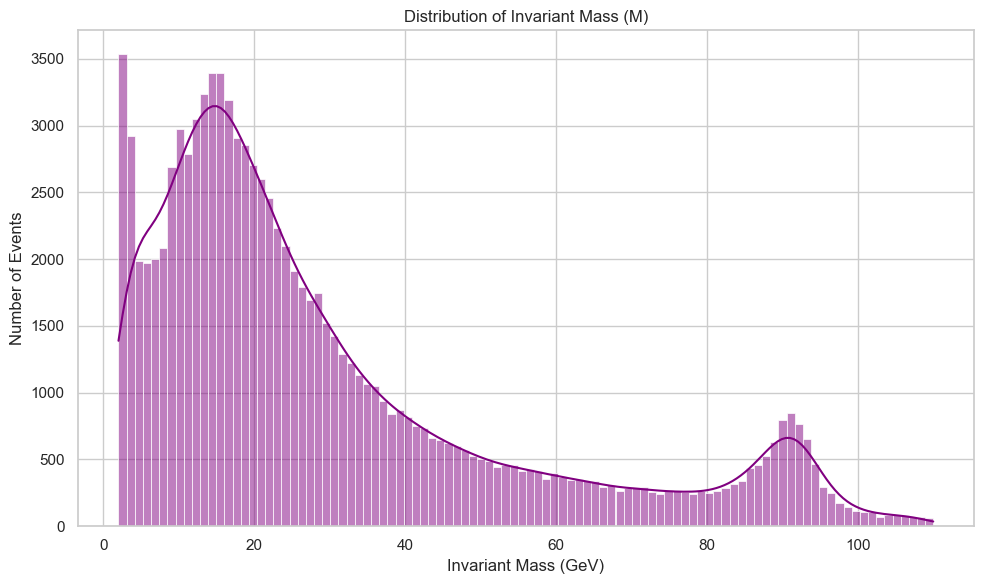

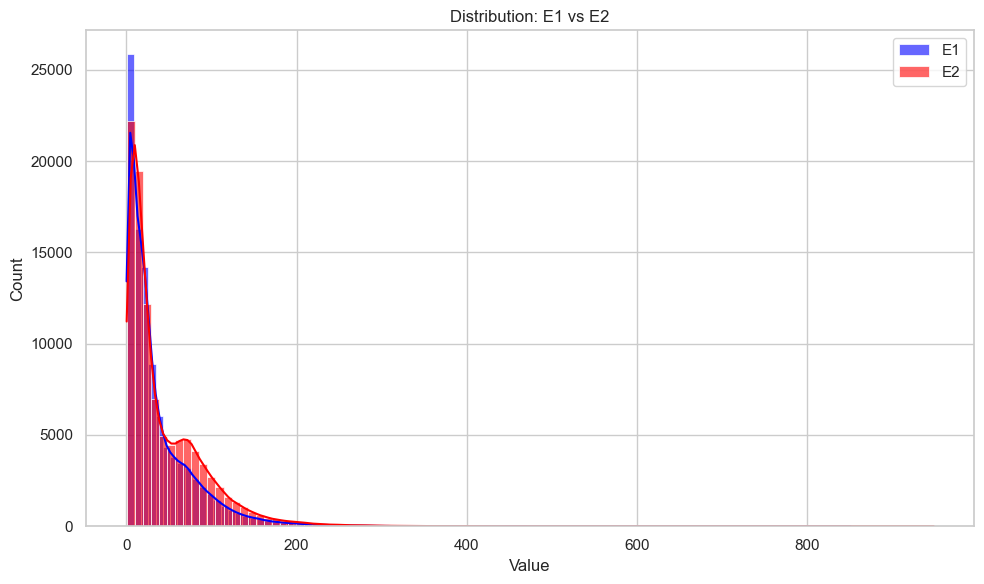

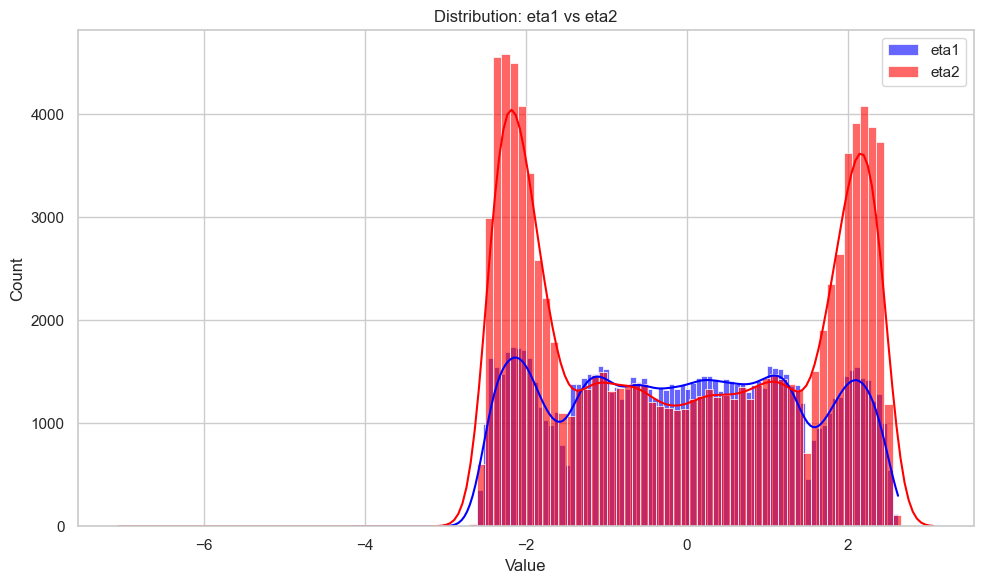

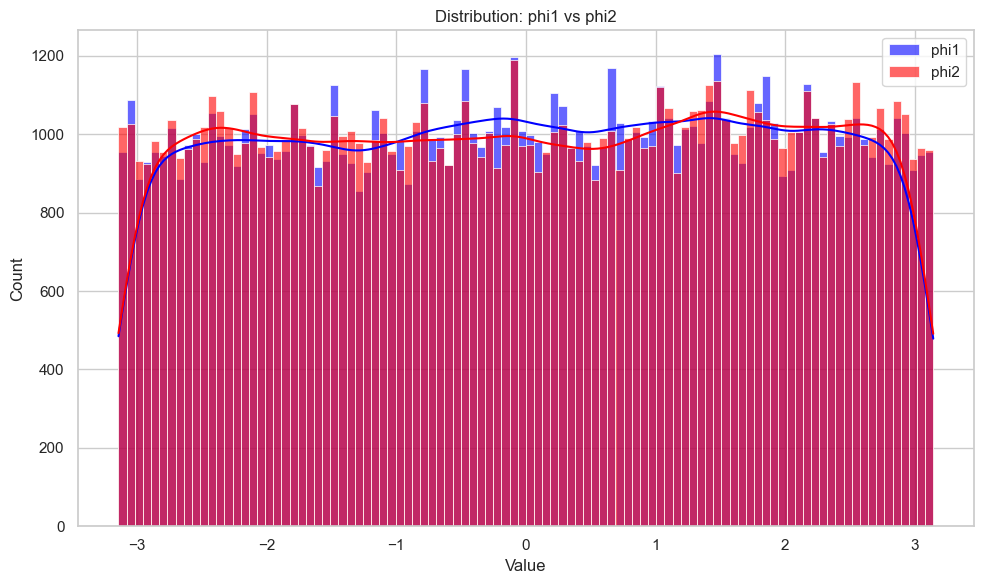

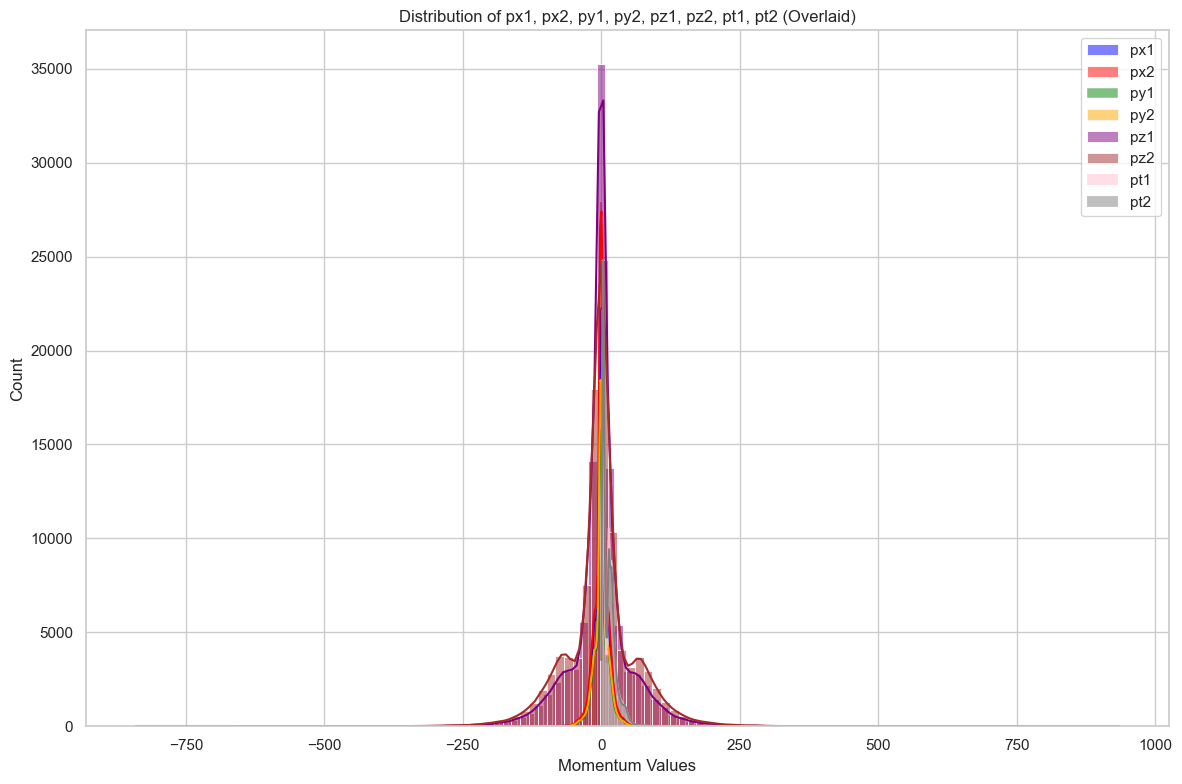

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv(r"C:\Users\kuzey\OneDrive\Masaüstü\fizi_proje\dielectron.csv")
df.columns = df.columns.str.strip()
df_viz = df.drop(["Run", "Event"], axis=1)

plt.figure()
sns.histplot(df_viz['M'], bins=100, kde=True, color="purple")
plt.title('Distribution of Invariant Mass (M)')
plt.xlabel('Invariant Mass (GeV)')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()


feature_pairs = [
    ('E1', 'E2', 'E1 vs E2'),
    ('eta1', 'eta2', 'eta1 vs eta2'),
    ('phi1', 'phi2', 'phi1 vs phi2')
]

for f1, f2, title in feature_pairs:
    plt.figure()
    sns.histplot(df_viz[f1], bins=100, kde=True, color="blue", label=f1, alpha=0.6)
    sns.histplot(df_viz[f2], bins=100, kde=True, color="red", label=f2, alpha=0.6)
    plt.title(f'Distribution: {title}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


momentum_features = ['px1', 'px2', 'py1', 'py2', 'pz1', 'pz2', 'pt1', 'pt2']
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'grey']

plt.figure(figsize=(12,8))
for feature, color in zip(momentum_features, colors):
    sns.histplot(df_viz[feature], bins=100, kde=True, label=feature, color=color, alpha=0.5)

plt.title('Distribution of px1, px2, py1, py2, pz1, pz2, pt1, pt2 (Overlaid)')
plt.xlabel('Momentum Values')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv(r"C:\Users\kuzey\OneDrive\Masaüstü\fizi_proje\dielectron.csv")
df.columns = df.columns.str.strip()

df_missing = df[df['M'].isnull()]
df_not_missing = df[df['M'].notnull()]

print(f"[INFO] Missing M values: {len(df_missing)}")
print(f"[INFO] Non-missing M values: {len(df_not_missing)}")

feature_cols = ['E1', 'E2', 'pt1', 'pt2', 'px1', 'px2', 'py1', 'py2', 'pz1', 'pz2', 'eta1', 'eta2', 'phi1', 'phi2']

X_train = df_not_missing[feature_cols]
X_missing = df_missing[feature_cols]

nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(X_train)

distances, indices = nn.kneighbors(X_missing)

filled_m_values = df_not_missing.iloc[indices.flatten()]['M'].values

df.loc[df['M'].isnull(), 'M'] = filled_m_values

print(f"[INFO] After filling, missing M values: {df['M'].isnull().sum()}")


[INFO] Missing M values: 85
[INFO] Non-missing M values: 99915
[INFO] After filling, missing M values: 0


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv(r"C:\Users\kuzey\OneDrive\Masaüstü\fizi_proje\dielectron.csv")
df.columns = df.columns.str.strip()

df = df.drop(["Run", "Event"], axis=1)

df_missing = df[df['M'].isnull()]
df_not_missing = df[df['M'].notnull()]

feature_cols = ['E1', 'E2', 'pt1', 'pt2', 'px1', 'px2', 'py1', 'py2', 'pz1', 'pz2', 'eta1', 'eta2', 'phi1', 'phi2']
X_train = df_not_missing[feature_cols]
X_missing = df_missing[feature_cols]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_train)

distances, indices = nn.kneighbors(X_missing)
filled_m_values = df_not_missing.iloc[indices.flatten()]['M'].values

df.loc[df['M'].isnull(), 'M'] = filled_m_values

df['label'] = df['M'].apply(lambda x: 1 if 85 <= x <= 95 else 0)

print(f"[INFO] Label distribution:\n{df['label'].value_counts()}")

df['total_energy'] = df['E1'] + df['E2']
df['delta_pt'] = np.abs(df['pt1'] - df['pt2'])
df['sum_px'] = df['px1'] + df['px2']
df['sum_py'] = df['py1'] + df['py2']
df['sum_pz'] = df['pz1'] + df['pz2']
df['delta_eta'] = np.abs(df['eta1'] - df['eta2'])

print("\n[INFO] Created new features: total_energy, delta_pt, sum_px, sum_py, sum_pz, delta_eta")


X = df.drop(['M', 'label'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_final = pd.DataFrame(X_scaled, columns=X.columns)
y_final = df['label']

print("\n[INFO] Final dataset shapes:")
print("Features X:", X_final.shape)
print("Labels y:", y_final.shape)


[INFO] Label distribution:
label
0    94334
1     5666
Name: count, dtype: int64

[INFO] Created new features: total_energy, delta_pt, sum_px, sum_py, sum_pz, delta_eta

[INFO] Final dataset shapes:
Features X: (100000, 22)
Labels y: (100000,)


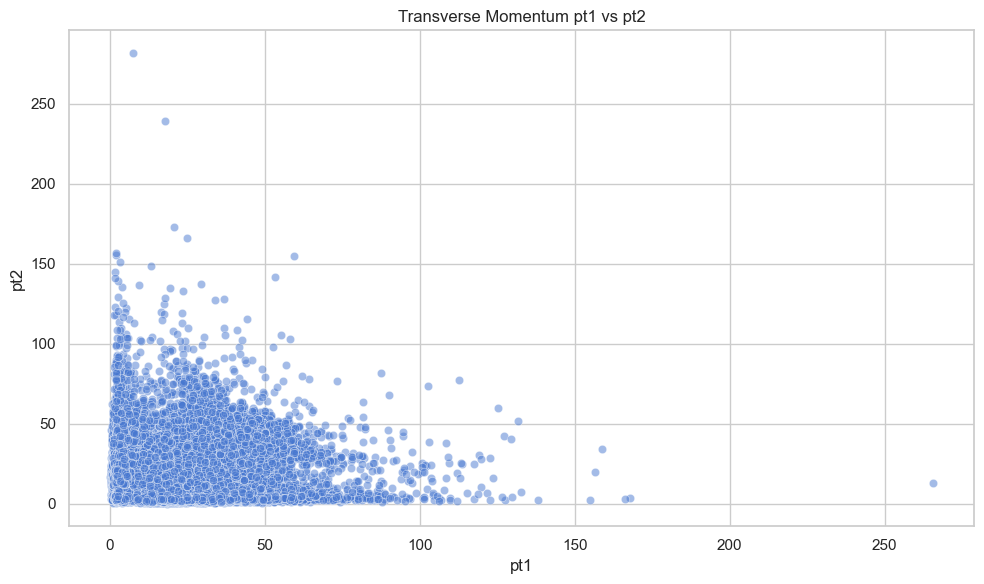

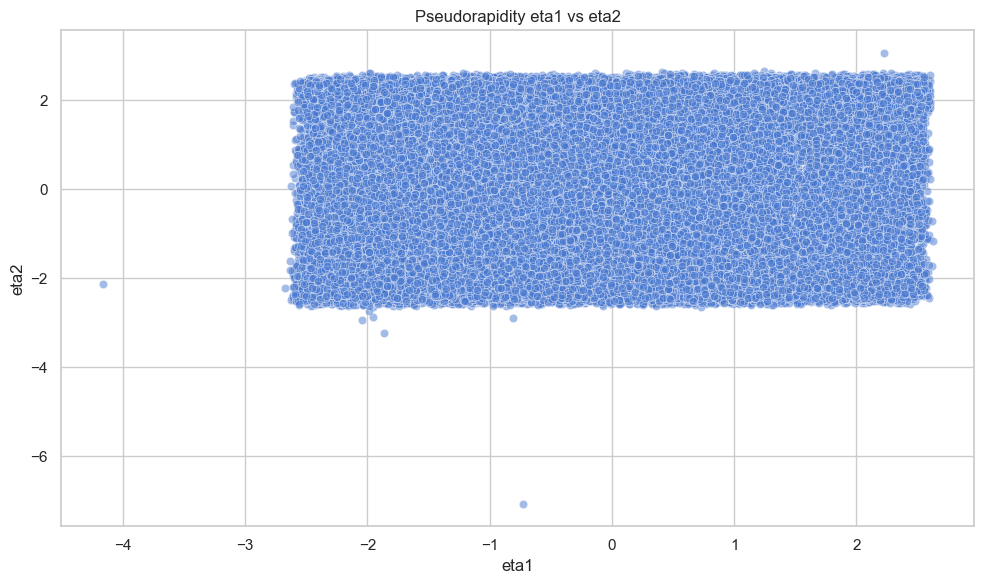

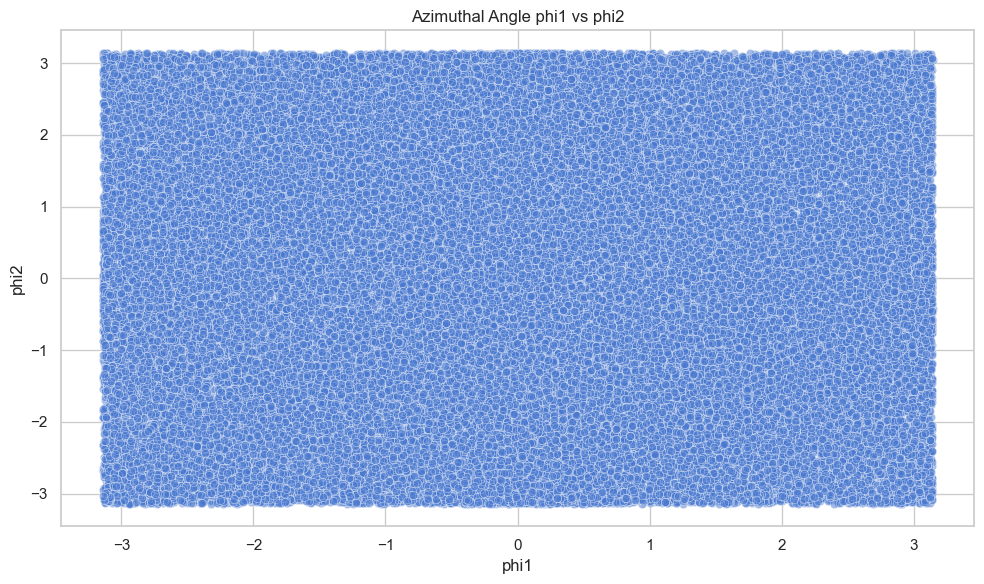

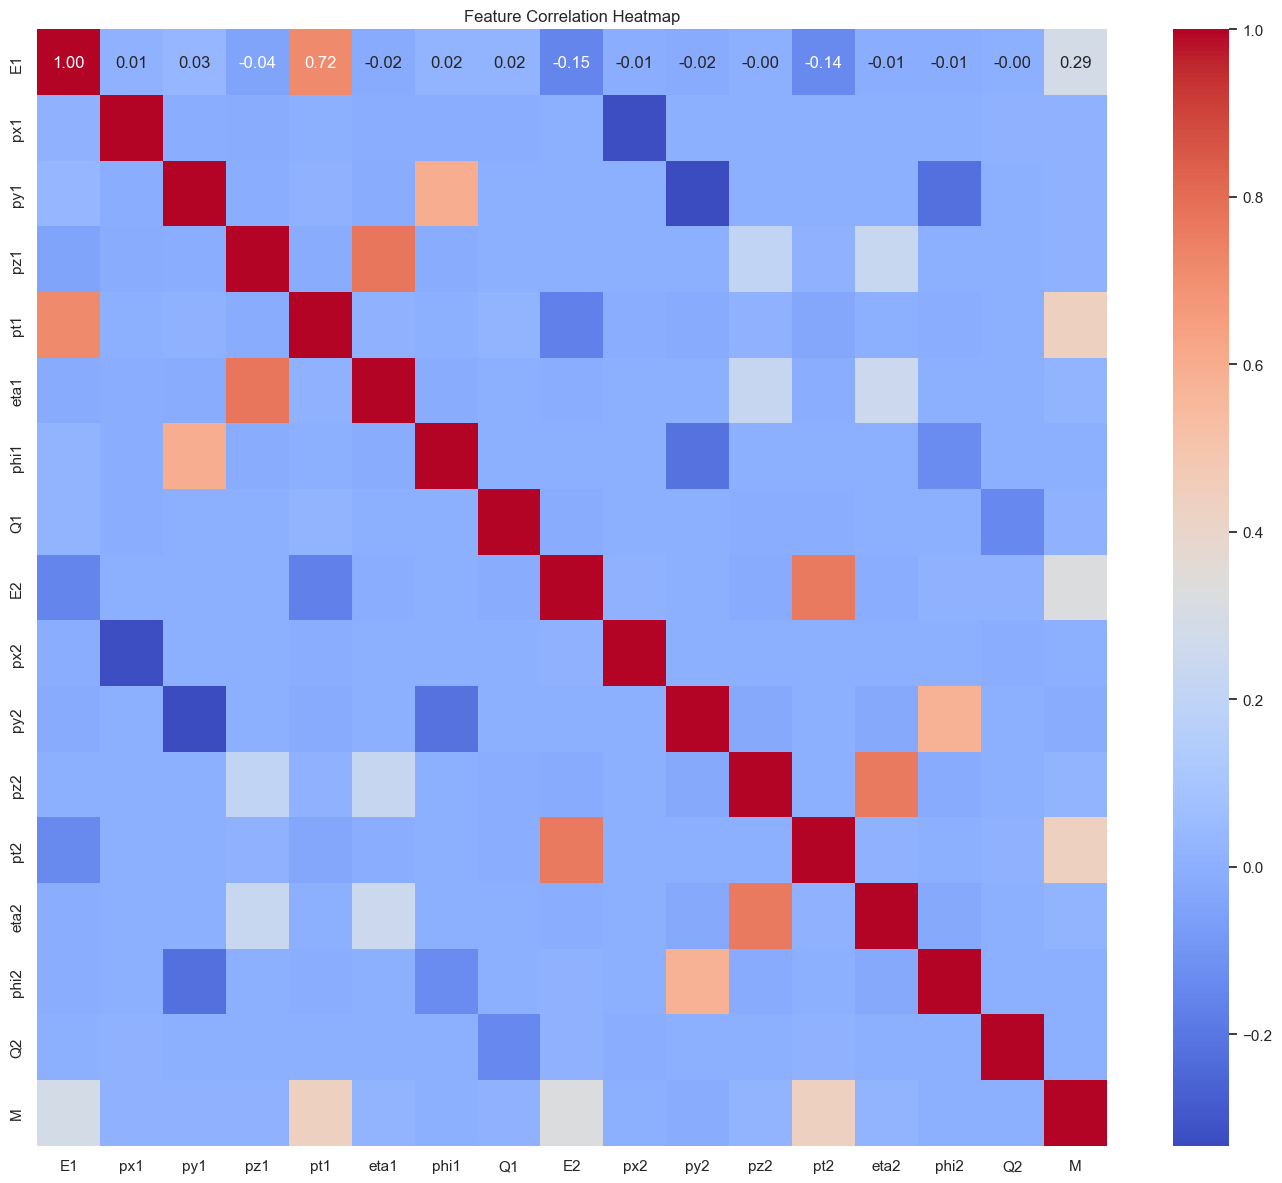

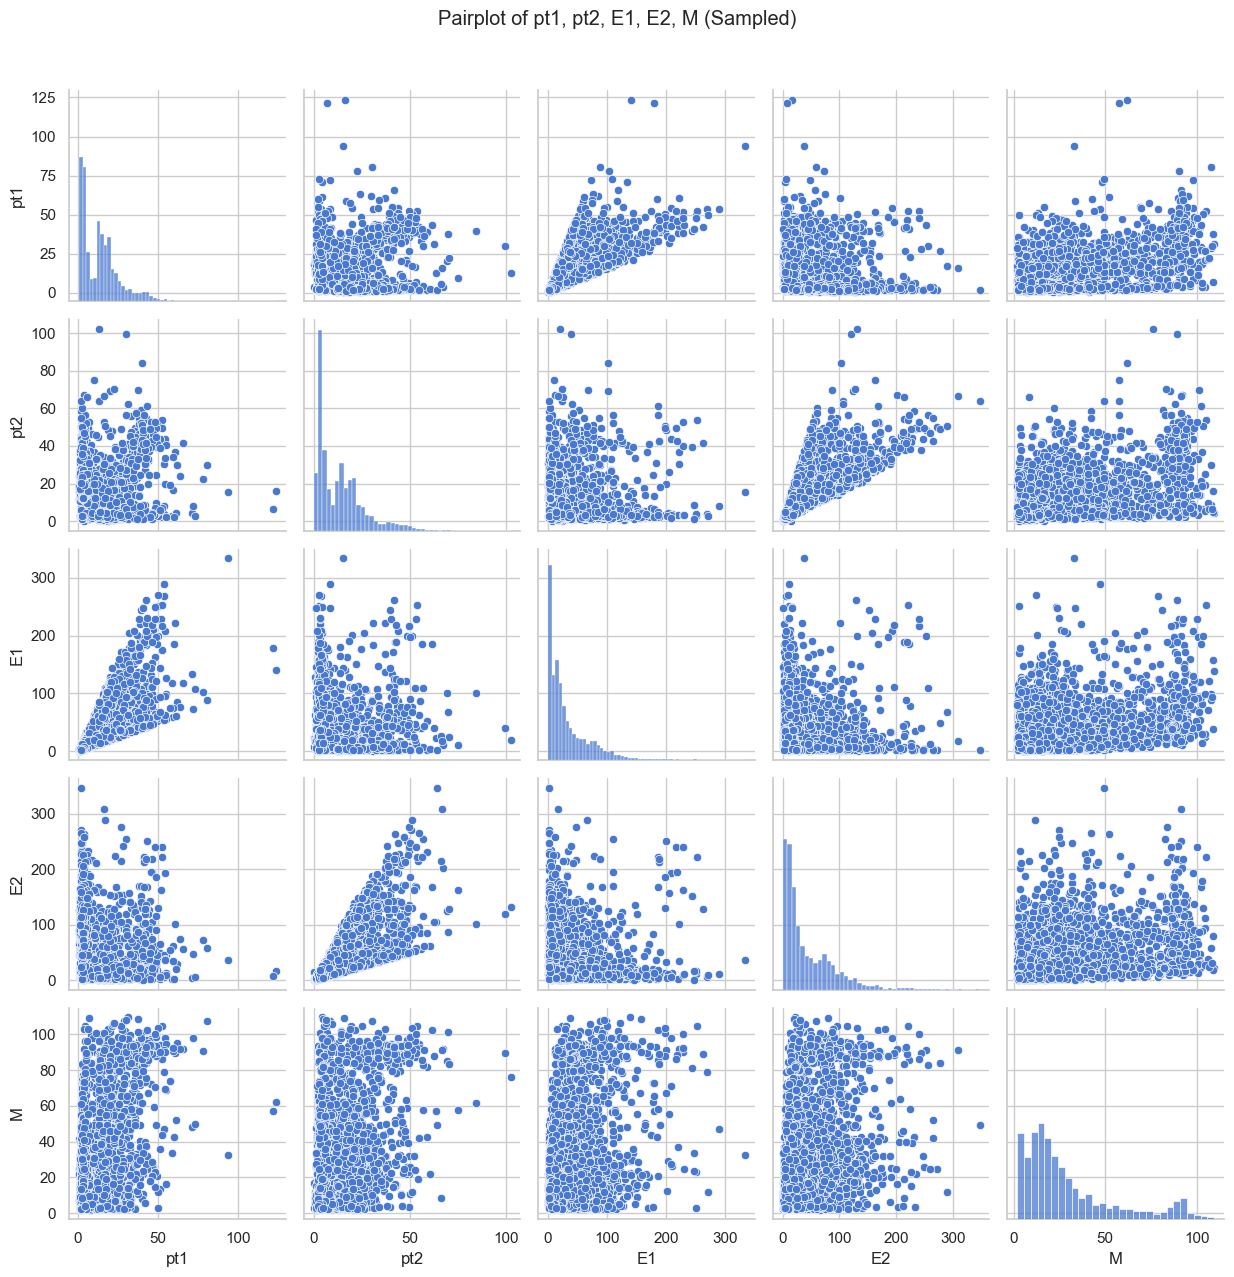

In [16]:

scatter_pairs = [
    ('pt1', 'pt2', 'Transverse Momentum pt1 vs pt2'),
    ('eta1', 'eta2', 'Pseudorapidity eta1 vs eta2'),
    ('phi1', 'phi2', 'Azimuthal Angle phi1 vs phi2')
]

for x_col, y_col, title in scatter_pairs:
    plt.figure()
    sns.scatterplot(x=x_col, y=y_col, data=df_viz, alpha=0.5)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(14,12))
corr = df_viz.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


sample_df = df_viz.sample(3000, random_state=42)
sns.pairplot(sample_df, vars=['pt1', 'pt2', 'E1', 'E2', 'M'])
plt.suptitle('Pairplot of pt1, pt2, E1, E2, M (Sampled)', y=1.02)
plt.tight_layout()
plt.show()


[INFO] Training size: (80000, 22), Test size: (20000, 22)

[INFO] Training LightGBM model...
Training until validation scores don't improve for 50 rounds
[100]	training's binary_error: 0.0094375	valid_1's binary_error: 0.0205
[200]	training's binary_error: 0.0034875	valid_1's binary_error: 0.0186
Early stopping, best iteration is:
[241]	training's binary_error: 0.0021875	valid_1's binary_error: 0.0182

[INFO] Test Accuracy: 98.18 %

[INFO] Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18867
           1       0.81      0.89      0.85      1133

    accuracy                           0.98     20000
   macro avg       0.90      0.94      0.92     20000
weighted avg       0.98      0.98      0.98     20000



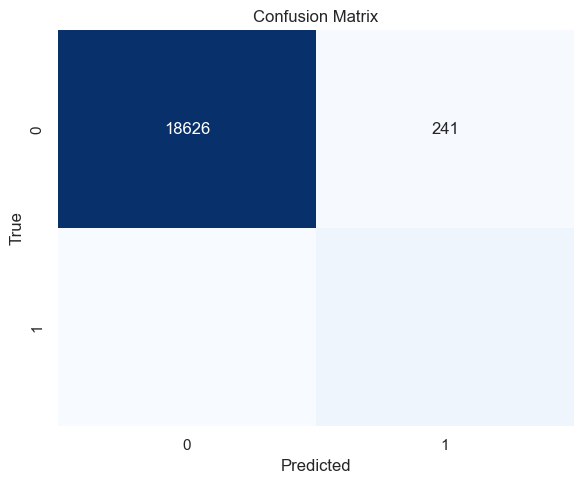

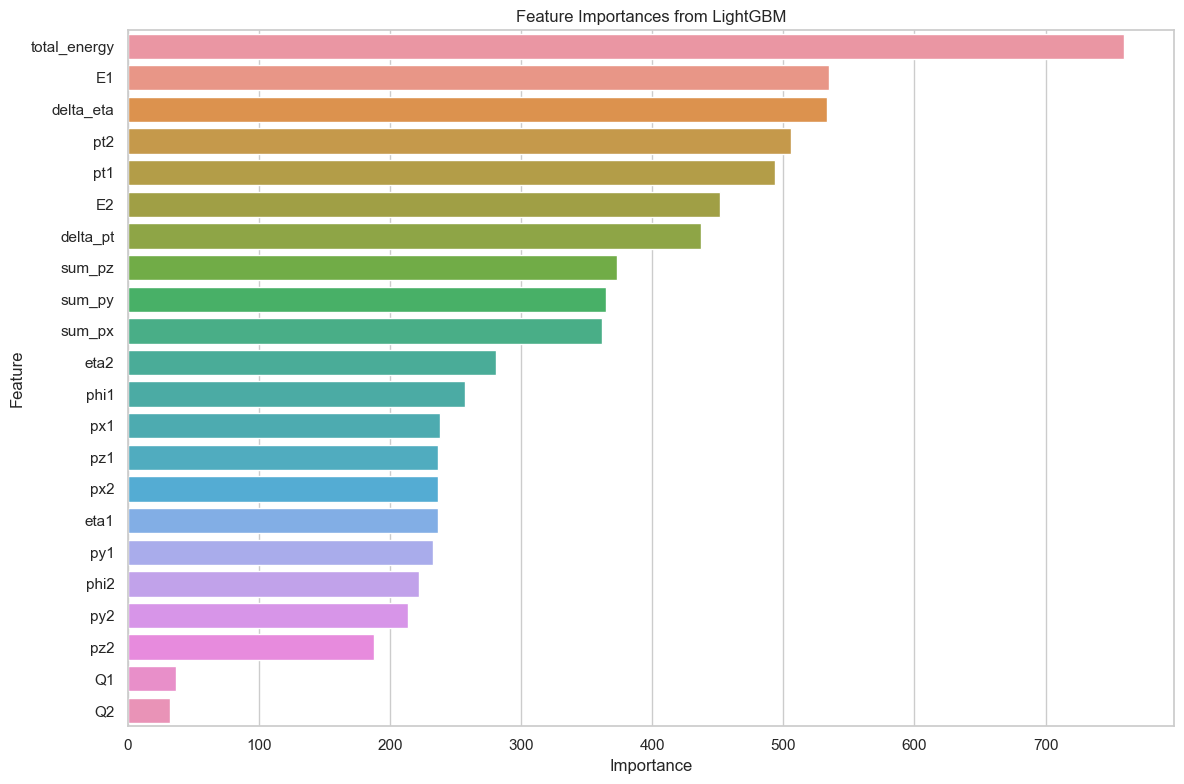

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb

warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print(f"[INFO] Training size: {X_train.shape}, Test size: {X_test.shape}")

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
}

from lightgbm import early_stopping, log_evaluation

print("\n[INFO] Training LightGBM model...")
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)  
    ]
)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print("\n[INFO] Test Accuracy:", round(acc * 100, 2), "%")

print("\n[INFO] Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

importance = model.feature_importance()
feature_names = model.feature_name()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from LightGBM')
plt.tight_layout()
plt.show()


In [19]:
import joblib

joblib.dump(model, r"C:\Users\kuzey\OneDrive\Masaüstü\fizi_proje\lgbm_model.pkl")

print("[INFO] Model saved successfully to fizi_proje\lgbm_model.pkl!")


[INFO] Model saved successfully to fizi_proje\lgbm_model.pkl!
